In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer

In [22]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


array([[<AxesSubplot:xlabel='math score', ylabel='math score'>,
        <AxesSubplot:xlabel='reading score', ylabel='math score'>,
        <AxesSubplot:xlabel='writing score', ylabel='math score'>],
       [<AxesSubplot:xlabel='math score', ylabel='reading score'>,
        <AxesSubplot:xlabel='reading score', ylabel='reading score'>,
        <AxesSubplot:xlabel='writing score', ylabel='reading score'>],
       [<AxesSubplot:xlabel='math score', ylabel='writing score'>,
        <AxesSubplot:xlabel='reading score', ylabel='writing score'>,
        <AxesSubplot:xlabel='writing score', ylabel='writing score'>]],
      dtype=object)

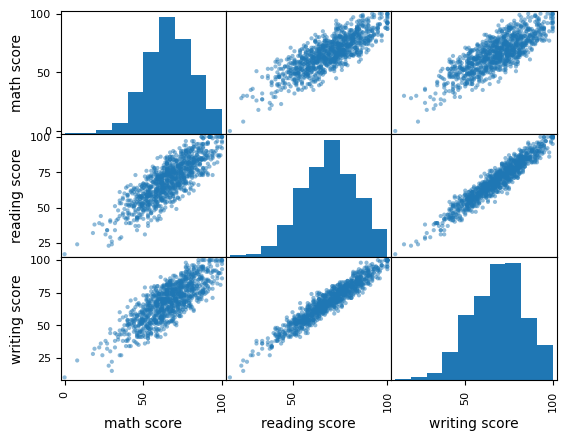

In [23]:
scatter_matrix(df)

In [24]:
num_features = ['math score', 'reading score']
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [25]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [26]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

score_transform = Pipeline([('pass', 'passthrough')])

X_train = pipeline.fit_transform(train_df)
Y_train = score_transform.fit_transform(train_df[['writing score']])

X_test = pipeline.transform(test_df)
Y_test = score_transform.transform(test_df[['writing score']])


In [27]:
X_train, Y_train

(array([[ 0.01478158,  0.35461887,  1.        , ...,  0.        ,
          1.        ,  0.        ],
        [-1.17435134, -0.18652581,  1.        , ...,  1.        ,
          0.        ,  1.        ],
        [-0.31553312,  1.1663359 ,  1.        , ...,  1.        ,
          1.        ,  0.        ],
        ...,
        [ 1.46816627,  0.62519122,  0.        , ...,  1.        ,
          0.        ,  1.        ],
        [-1.63679192, -1.6070306 ,  1.        , ...,  0.        ,
          0.        ,  1.        ],
        [-1.30647722, -1.74231677,  0.        , ...,  0.        ,
          1.        ,  0.        ]]),
      writing score
 692             81
 589             65
 158             87
 443             76
 397             95
 ..             ...
 422             67
 50              48
 53              75
 807             40
 928             44
 
 [800 rows x 1 columns])

In [28]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [29]:
Y_hat = model.predict(X_test)

In [30]:
Y_pred = score_transform.inverse_transform(Y_hat)
Y_target = score_transform.inverse_transform(Y_test)

In [31]:
error = mean_squared_error(Y_pred, Y_target)
error

36.01625

In [32]:
list(zip(Y_pred, Y_target.values.flatten()))

[(82.0, 78),
 (78.0, 72),
 (88.0, 90),
 (73.0, 78),
 (60.0, 55),
 (83.0, 77),
 (55.0, 47),
 (32.0, 27),
 (89.0, 82),
 (84.0, 92),
 (50.0, 64),
 (84.0, 88),
 (27.0, 27),
 (60.0, 66),
 (54.0, 68),
 (76.0, 75),
 (80.0, 70),
 (68.0, 62),
 (62.0, 70),
 (60.0, 68),
 (62.0, 56),
 (64.0, 58),
 (81.0, 90),
 (65.0, 78),
 (80.0, 84),
 (79.0, 91),
 (73.0, 80),
 (80.0, 79),
 (91.0, 84),
 (77.0, 74),
 (67.0, 65),
 (49.0, 52),
 (28.0, 38),
 (80.0, 79),
 (67.0, 74),
 (56.0, 61),
 (73.0, 79),
 (74.0, 70),
 (81.0, 79),
 (82.0, 71),
 (62.0, 72),
 (41.0, 41),
 (63.0, 68),
 (50.0, 50),
 (62.0, 67),
 (75.0, 79),
 (71.0, 76),
 (62.0, 49),
 (41.0, 42),
 (94.0, 85),
 (89.0, 89),
 (78.0, 70),
 (43.0, 46),
 (74.0, 69),
 (91.0, 81),
 (89.0, 85),
 (72.0, 73),
 (91.0, 93),
 (83.5, 84),
 (53.0, 51),
 (72.0, 74),
 (73.0, 71),
 (80.0, 76),
 (70.0, 74),
 (85.0, 86),
 (73.0, 67),
 (83.0, 82),
 (91.0, 81),
 (71.0, 74),
 (50.0, 46),
 (73.0, 74),
 (79.0, 72),
 (67.0, 64),
 (75.0, 68),
 (95.0, 94),
 (59.0, 63),
 (77.0, 67),